In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('day.csv')

## Borrar variables

In [2]:
df = df.drop(columns=['casual','registered','instant','dteday','mnth','yr'])
target = 'cnt'
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Dummies

In [3]:
df = pd.get_dummies(df, columns=['season','weathersit','weekday'])
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,True,False,False,...,True,False,False,False,True,False,False,False,False,False
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,True,False,False,...,True,False,False,False,False,False,True,False,False,False


## Visualizar datos

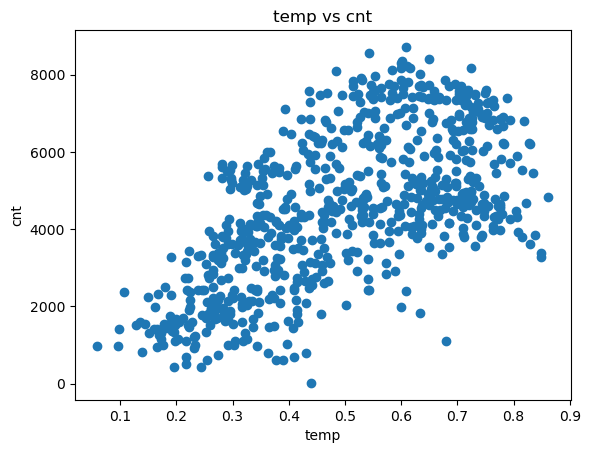

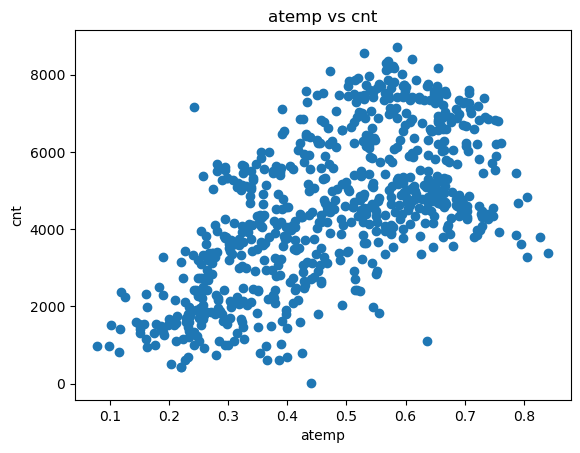

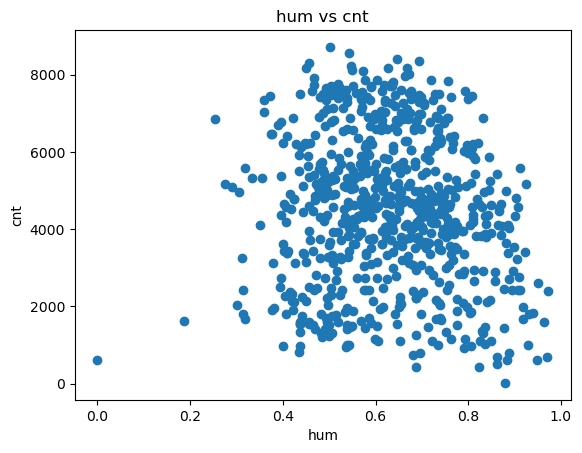

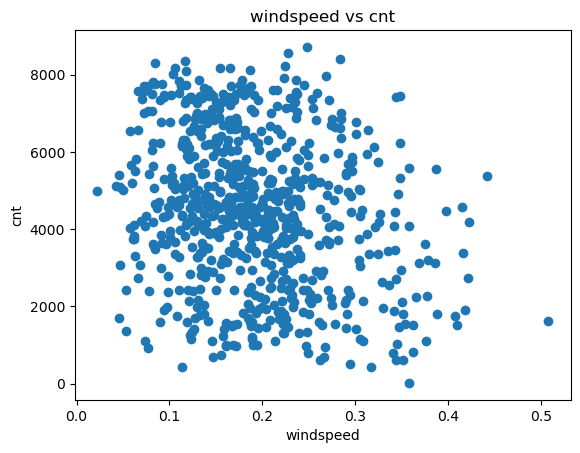

In [4]:
num_features = ['temp','atemp','hum','windspeed']

for i in num_features:
    plt.scatter(df[i],df['cnt'])
    plt.title(f'{i} vs cnt')
    plt.xlabel(i)
    plt.ylabel('cnt')
    plt.show()

## Análisis bivariado

In [5]:
df_numerical = df[['temp','atemp','hum','windspeed','cnt']]
df_numerical = df_numerical.copy()

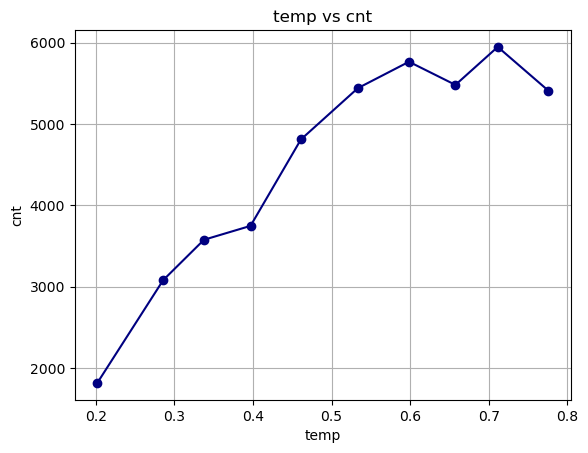

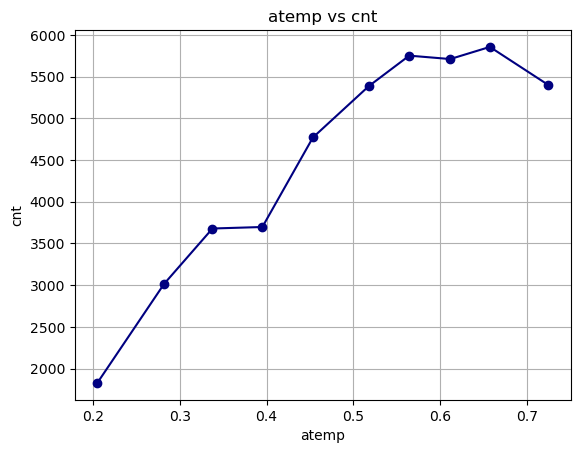

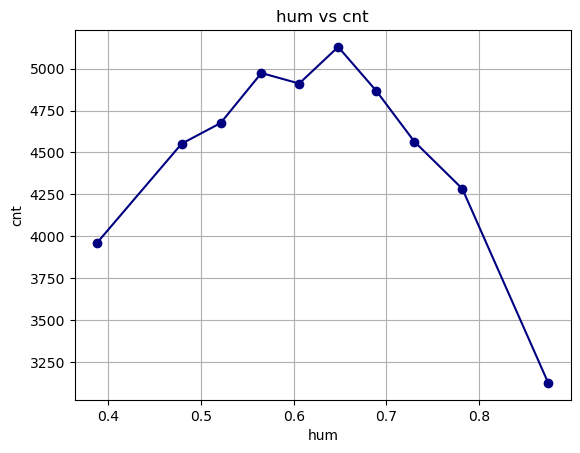

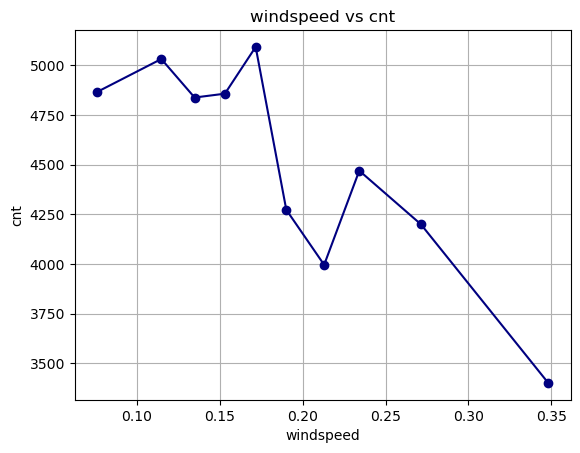

In [6]:
for feature in num_features:
    df_numerical[f'{feature}_bins'] = pd.qcut(df_numerical[feature], q=10, labels=False) + 1
    grouped = df_numerical.groupby(f'{feature}_bins').mean()
    plt.plot(grouped[feature], grouped['cnt'], marker='o', c='navy')
    plt.title(f'{feature} vs cnt')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.grid()
    plt.show()

## Modelos

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cnt']), df[target], test_size=0.2, random_state=42)

In [8]:
model_linear = linear_model.LinearRegression().fit(X_train, y_train)
predicciones = model_linear.predict(X_test)
r2_score(y_pred = predicciones, y_true = y_test)

0.5546923653188565

In [9]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly_2 = poly_features.fit_transform(X_train)
X_test_poly_2 = poly_features.fit_transform(X_test)

model_poly_2 = linear_model.LinearRegression()
model_poly_2.fit(X_train_poly_2, y_train)

predicciones_poly_2 = model_poly_2.predict(X_test_poly_2)
r2_score(y_pred = predicciones_poly_2, y_true = y_test)

-1.1661632192863697e+23

In [10]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly_3 = poly_features.fit_transform(X_train)
X_test_poly_3 = poly_features.fit_transform(X_test)

model_poly_3 = linear_model.LinearRegression()
model_poly_3.fit(X_train_poly_3, y_train)

predicciones_poly_3 = model_poly_3.predict(X_test_poly_3)
r2_score(y_pred = predicciones_poly_3, y_true = y_test)

-6.461248291641846e+22

## Calibración

In [11]:
calibracion = pd.DataFrame({
    'predicciones': predicciones,
    'predicciones_poly_2': predicciones_poly_2,
    'predicciones_poly_3': predicciones_poly_3,
    'real': y_test
})

In [19]:
calibracion['predicciones_bins'] = pd.qcut(calibracion['predicciones'], q=10, labels=False) + 1
grouped_calibracion = calibracion.groupby('predicciones_bins').mean()
grouped_calibracion

,predicciones,predicciones_poly_2,predicciones_poly_3,real
predicciones_bins,,,,
1,1993.600000,1.256992e+03,-3.754373e+13,1654.266667
2,2788.750000,2.926750e+03,-3.824701e+12,2267.000000
3,3459.076923,3.404817e+03,3.014154e+03,2756.153846
4,4051.466667,3.991175e+03,-3.082517e+13,3497.400000
5,4413.866667,4.242192e+03,-1.269577e+13,4189.400000
6,4832.571429,4.981054e+03,4.664286e+03,5505.357143
7,5255.200000,5.588925e+03,5.529067e+03,5517.666667
8,5627.714286,5.842554e+03,1.172222e+13,5094.500000
9,5938.400000,5.527298e+14,-4.069020e+14,6858.066667


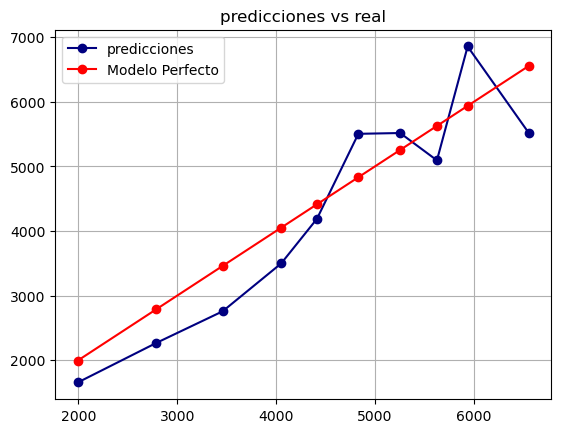

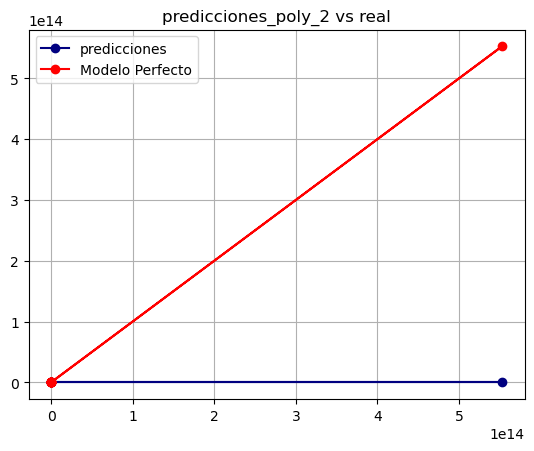

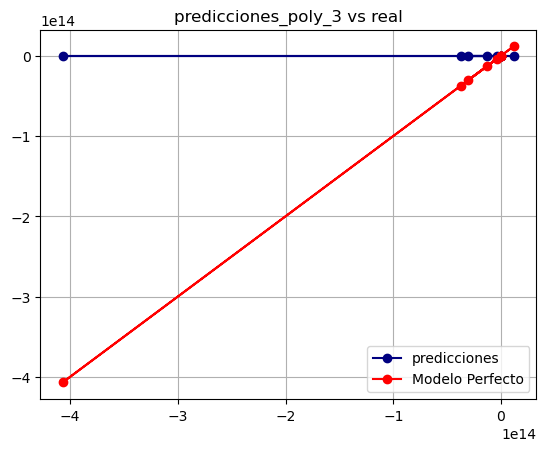

In [22]:
predicts = ['predicciones','predicciones_poly_2','predicciones_poly_3']

for pred in predicts:
    plt.plot(grouped_calibracion[pred], grouped_calibracion['real'], marker='o', c='navy', label='predicciones')
    plt.plot(grouped_calibracion[pred], grouped_calibracion[pred], marker='o', c='red', label='Modelo Perfecto')

    plt.title(f'{pred} vs real')
    plt.legend()
    plt.grid()
    plt.show();